In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [2]:
df = pd.read_csv('Final DF.csv')
df = df.drop(columns='Unnamed: 0')

In [3]:
df.head()

,Game_Title,Franchise,All_Time_Sales,Weeks_Out,Weekly_Sales,Genre,Console,Publisher
0,.hack//G.U. Last Recode,0,86008,1,86008.000000,Role-Playing,PS4,Namco Bandai Games
1,1-2-Switch,0,1927365,62,32010.285714,Party,NS,Nintendo
2,A Way Out,0,186767,4,46691.750000,Action,PS4,Electronic Arts
3,A Way Out,0,42659,1,42659.000000,Action,XOne,Electronic Arts
4,ABZU,0,24841,1,24841.000000,Adventure,PS4,505 Games


In [4]:
#To convert my Publishers, Genres, and Consoles Columns into Dummy Variables since these are categorical features.
pub_dummies = pd.get_dummies(df["Publisher"], prefix="pub")
gen_dummies = pd.get_dummies(df["Genre"], prefix="gen")
con_dummies = pd.get_dummies(df["Console"], prefix="con")

In [5]:
df = pd.concat([df, pub_dummies, gen_dummies, con_dummies], axis=1)
df.head()

,Game_Title,Franchise,All_Time_Sales,Weeks_Out,Weekly_Sales,Genre,Console,Publisher,pub_505 Games,pub_Activision,...,con_3DS,con_NS,con_PC,con_PS3,con_PS4,con_PSV,con_Sumikko Gurashi: Koko,con_WiiU,con_X360,con_XOne
0,.hack//G.U. Last Recode,0,86008,1,86008.000000,Role-Playing,PS4,Namco Bandai Games,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1-2-Switch,0,1927365,62,32010.285714,Party,NS,Nintendo,0,0,...,0,1,0,0,0,0,0,0,0,0
2,A Way Out,0,186767,4,46691.750000,Action,PS4,Electronic Arts,0,0,...,0,0,0,0,1,0,0,0,0,0
3,A Way Out,0,42659,1,42659.000000,Action,XOne,Electronic Arts,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ABZU,0,24841,1,24841.000000,Adventure,PS4,505 Games,1,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
#need to change column names for the dummy publishers because of spaces
cleaned_dummies = []
for names in list(df.columns)[5:]:
    cleaned_dummies.append(names.replace(' ', '_'))
    
a = dict(zip(list(df.columns[5:]), cleaned_dummies))

In [7]:
#Doing it this way because some of the dummy variables have 
#characters that break the code - so need to manually change.
df = df.rename(columns={'Publisher': 'Publisher',
 'pub_505 Games': 'pub_505_Games',
 'pub_Activision': 'pub_Activision',
 'pub_Aksys Games': 'pub_Aksys_Games',
 'pub_Aqua Plus': 'pub_Aqua_Plus',
 'pub_Aquaplus': 'pub_Aquaplus',
 'pub_Arc System Works': 'pub_Arc_System_Works',
 'pub_Atlus': 'pub_Atlus',
 'pub_Bandai Namco Entertainment': 'pub_Bandai_Namco_Entertainment',
 'pub_Bethesda Softworks': 'pub_Bethesda_Softworks',
 'pub_Big Ben Interactive': 'pub_Big_Ben_Interactive',
 'pub_Broccoli': 'pub_Broccoli',
 'pub_Capcom': 'pub_Capcom',
 'pub_Capcom Entertainment': 'pub_Capcom_Entertainment',
 'pub_City Interactive': 'pub_City_Interactive',
 'pub_Codemasters': 'pub_Codemasters',
 'pub_Compile Heart': 'pub_Compile_Heart',
 'pub_D3Publisher ': 'pub_D3Publisher_',
 'pub_Deep Silver': 'pub_Deep_Silver',
 'pub_Electronic Arts': 'pub_Electronic_Arts',
 'pub_Falcom': 'pub_Falcom',
 'pub_Focus Home Interactive': 'pub_Focus_Home_Interactive',
 'pub_Frontier Developments': 'pub_Frontier_Developments',
 'pub_FuRyu Corporation': 'pub_FuRyu_Corporation',
 'pub_Gearbox Software': 'pub_Gearbox_Software',
 'pub_Grey Box': 'pub_Grey_Box',
 'pub_Gun Media': 'pub_Gun_Media',
 'pub_Kadokawa Games': 'pub_Kadokawa_Games',
 'pub_Koch Media': 'pub_Koch_Media',
 'pub_Konami Digital Entertainment': 'pub_Konami_Digital_Entertainment',
 'pub_Level 5': 'pub_Level_5',
 'pub_Marvelous': 'pub_Marvelous',
 'pub_Marvelous Interactive': 'pub_Marvelous_Interactive',
 'pub_Maximum Games': 'pub_Maximum_Games',
 'pub_Merge Games': 'pub_Merge_Games',
 'pub_Microsoft Game Studios': 'pub_Microsoft_Game_Studios',
 'pub_Microsoft Studios': 'pub_Microsoft_Studios',
 'pub_Milestone': 'pub_Milestone',
 'pub_Milestone S.r.l.': 'pub_Milestone_Srl',
 'pub_Mojang': 'pub_Mojang',
 'pub_Namco Bandai Games': 'pub_Namco_Bandai_Games',
 'pub_Natsume': 'pub_Natsume',
 'pub_Nicalis': 'pub_Nicalis',
 'pub_Nighthawk Interactive': 'pub_Nighthawk_Interactive',
 'pub_Nihon Falcom Corporation': 'pub_Nihon_Falcom_Corporation',
 'pub_Nintendo': 'pub_Nintendo',
 'pub_Nippon Ichi Software': 'pub_Nippon_Ichi_Software',
 'pub_PQube': 'pub_PQube',
 'pub_Ready at Dawn': 'pub_Ready_at_Dawn',
 'pub_Rebellion Developments': 'pub_Rebellion_Developments',
 'pub_Screenlife': 'pub_Screenlife',
 'pub_Sega': 'pub_Sega',
 'pub_Sold Out': 'pub_Sold_Out',
 'pub_Sony Computer Entertainment': 'pub_Sony_Computer_Entertainment',
 'pub_Sony Computer Entertainment America': 'pub_Sony_Computer_Entertainment_America',
 'pub_Sony Computer Entertainment Europe': 'pub_Sony_Computer_Entertainment_Europe',
 'pub_Sony Interactive Entertainment': 'pub_Sony_Interactive_Entertainment',
 'pub_Spike Chunsoft': 'pub_Spike_Chunsoft',
 'pub_Square Enix': 'pub_Square_Enix',
 'pub_Studio Wildcard': 'pub_Studio_Wildcard',
 'pub_Sumikko Gurashi: Koko': 'pub_Sumikko_Gurashi_Koko',
 'pub_THQ Nordic': 'pub_THQ_Nordic',
 'pub_Take-Two Interactive': 'pub_TakeTwo_Interactive',
 'pub_Tecmo Koei': 'pub_Tecmo_Koei',
 'pub_Ubisoft': 'pub_Ubisoft',
 'pub_Warner Bros. Interactive Entertainment': 'pub_Warner_Bros_Interactive_Entertainment',
 'pub_Xseed Games': 'pub_Xseed_Games',
 'gen_Action': 'gen_Action',
 'gen_Action-Adventure': 'gen_ActionAdventure',
 'gen_Adventure': 'gen_Adventure',
 'gen_Dokonan Desu? (3DS)Nippon Columbia': 'gen_Strategy',
 'gen_Fighting': 'gen_Fighting',
 'gen_MMO': 'gen_MMO',
 'gen_Misc': 'gen_Misc',
 'gen_Music': 'gen_Music',
 'gen_Party': 'gen_Party',
 'gen_Platform': 'gen_Platform',
 'gen_Puzzle': 'gen_Puzzle',
 'gen_Racing': 'gen_Racing',
 'gen_Role-Playing': 'gen_RolePlaying',
 'gen_Sandbox': 'gen_Sandbox',
 'gen_Shooter': 'gen_Shooter',
 'gen_Simulation': 'gen_Simulation',
 'gen_Sports': 'gen_Sports',
 'gen_Strategy': 'gen_Strategy',
 'con_3DS': 'con_3DS',
 'con_NS': 'con_NS',
 'con_PC': 'con_PC',
 'con_PS3': 'con_PS3',
 'con_PS4': 'con_PS4',
 'con_PSV': 'con_PSV',
 'con_Sumikko Gurashi: Koko': 'con_Sumikko_Gurashi_Koko',
 'con_WiiU': 'con_WiiU',
 'con_X360': 'con_X360',
 'con_XOne': 'con_XOne'})

In [8]:
# In order to implement my dummy variables into my OLS Formula
dummy = ''
for names in cleaned_dummies:
    dummy += names
    dummy += '+'
dummy

'Genre+Console+Publisher+pub_505_Games+pub_Activision+pub_Aksys_Games+pub_Aqua_Plus+pub_Aquaplus+pub_Arc_System_Works+pub_Atlus+pub_Bandai_Namco_Entertainment+pub_Bethesda_Softworks+pub_Big_Ben_Interactive+pub_Broccoli+pub_Capcom+pub_Capcom_Entertainment+pub_City_Interactive+pub_Codemasters+pub_Compile_Heart+pub_D3Publisher_+pub_Deep_Silver+pub_Electronic_Arts+pub_Falcom+pub_Focus_Home_Interactive+pub_Frontier_Developments+pub_FuRyu_Corporation+pub_Gearbox_Software+pub_Grey_Box+pub_Gun_Media+pub_Kadokawa_Games+pub_Koch_Media+pub_Konami_Digital_Entertainment+pub_Level_5+pub_Marvelous+pub_Marvelous_Interactive+pub_Maximum_Games+pub_Merge_Games+pub_Microsoft_Game_Studios+pub_Microsoft_Studios+pub_Milestone+pub_Milestone_S.r.l.+pub_Mojang+pub_Namco_Bandai_Games+pub_Natsume+pub_Nicalis+pub_Nighthawk_Interactive+pub_Nihon_Falcom_Corporation+pub_Nintendo+pub_Nippon_Ichi_Software+pub_PQube+pub_Ready_at_Dawn+pub_Rebellion_Developments+pub_Screenlife+pub_Sega+pub_Sold_Out+pub_Sony_Computer_Enter

In [9]:
form = ('All_Time_Sales~Franchise+Weekly_Sales+Weeks_Out+pub_Activision+pub_Electronic_Arts+pub_Gearbox_Software+pub_Microsoft_Game_Studios+pub_Nintendo+pub_Sega+pub_Sony_Computer_Entertainment+pub_Sony_Computer_Entertainment_America+pub_Sony_Interactive_Entertainment+pub_TakeTwo_Interactive+pub_Ubisoft+gen_Action+gen_ActionAdventure+gen_Adventure+gen_Fighting+gen_Misc+gen_Racing+gen_Shooter+con_NS+con_PC+con_PS3+con_PS4+con_PSV+con_3DS+con_WiiU+con_X360+con_XOne')




In [10]:
lr_model = ols(formula=form, data=df).fit()

In [11]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         All_Time_Sales   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     30.06
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           1.95e-91
Time:                        10:28:48   Log-Likelihood:                -8074.9
No. Observations:                 517   AIC:                         1.621e+04
Df Residuals:                     486   BIC:                         1.634e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -1.344e+05   1.51e+06     -0.089      0.929   -3.11e+06    2.84e+06
Franchise                                1.749e+05   1.11e+05      1.575      0.116   -4.33e+04    3.93e+05
Weekly_Sales                                6.2322      0.509     12.247      0.000       5.232       7.232
Weeks_Out                                4.336e+04   2044.669     21.208      0.000    3.93e+04    4.74e+04
pub_Activision                           1.201e+06   3.79e+05      3.168      0.002    4.56e+05    1.95e+06
pub_Electronic_Arts                      1.179e+06   2.77e+05      4.264      0.000    6.36e+05    1.72e+06
pub_Gearbox_Software                    -8.003e+05   5.98e+05     -1.338      0.182   -1.98e+06    3.75e+05
pub_Microsoft_Game_Studios               7.177e+05    7.1e+05      1.010      0.313   -6.78e+05    2.11e+06
pub_Nintendo                             1.145e+06   2.89e+05      3.958      0.000    5.77e+05    1.71e+06
pub_Sega                                -7.777e+05   3.53e+05     -2.205      0.028   -1.47e+06   -8.48e+04
pub_Sony_Computer_Entertainment          7.936e+05    4.8e+05      1.654      0.099   -1.49e+05    1.74e+06
pub_Sony_Computer_Entertainment_America -9.401e+05   1.17e+06     -0.804      0.422   -3.24e+06    1.36e+06
pub_Sony_Interactive_Entertainment       6.012e+05   3.54e+05      1.698      0.090   -9.45e+04     1.3e+06
pub_TakeTwo_Interactive                  1.416e+06   3.86e+05      3.673      0.000    6.58e+05    2.17e+06
pub_Ubisoft                               4.11e+05   3.03e+05      1.355      0.176   -1.85e+05    1.01e+06
gen_Action                               2.571e+05   1.93e+05      1.330      0.184   -1.23e+05    6.37e+05
gen_ActionAdventure                      5.586e+05   2.94e+05      1.899      0.058   -1.94e+04    1.14e+06
gen_Adventure                           -6.921e+05   3.49e+05     -1.981      0.048   -1.38e+06   -5753.263
gen_Fighting                            -3.009e+05   2.98e+05     -1.010      0.313   -8.86e+05    2.85e+05
gen_Misc                                -5.952e+05   3.85e+05     -1.547      0.122   -1.35e+06    1.61e+05
gen_Racing                               2.391e+05   3.06e+05      0.782      0.434   -3.61e+05     8.4e+05
gen_Shooter                              4.075e+05   2.67e+05      1.524      0.128   -1.18e+05    9.33e+05
con_NS                                  -5.128e+05   1.53e+06     -0.335      0.738   -3.52e+06    2.49e+06
con_PC                                  -1.118e+06   1.57e+06     -0.710      0.478   -4.21e+06    1.98e+06
con_PS3                                   -1.6e+06   1.86e+06     -0.859      0.391   -5.26e+06    2.06e+06
con_PS4                                 -3.037e+05   1.52e+

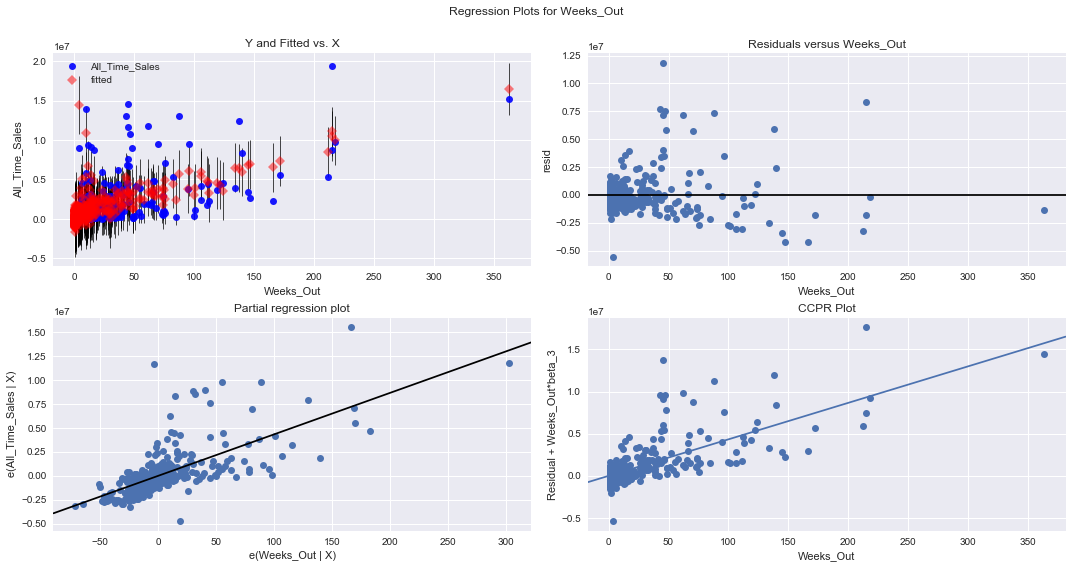

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(lr_model, "Weeks_Out", fig=fig)
plt.show()

/Users/hiowatah/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


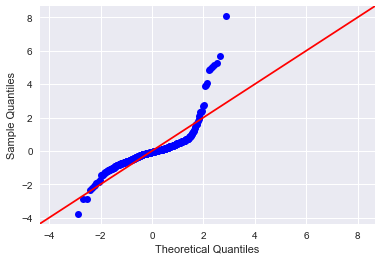

In [13]:
import scipy.stats as stats
residuals = lr_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

Text(0.5, 1.0, 'Linearity Check')

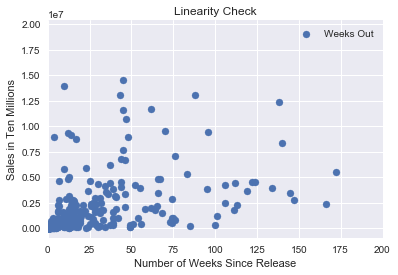

In [14]:
plt.scatter(df.Weeks_Out,df.All_Time_Sales, label = 'Weeks Out');
plt.legend();
plt.xlabel('Number of Weeks Since Release')
plt.ylabel('Sales in Ten Millions')
plt.xlim(0, 200)
plt.title('Linearity Check')